In [274]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [275]:
df=pd.read_csv("/content/drive/MyDrive/chipotle.tsv",sep='\t')
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [276]:
df.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [278]:
# Replace null values in the 'Choice Description' column with a default value
df['choice_description'].fillna('None', inplace=True)
df.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,None,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,None,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,None,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [279]:
# Remove the dollar sign and convert the column to numeric
df['item_price'] = pd.to_numeric(df['item_price'].replace('[\$,]', '', regex=True), errors='coerce')

In [280]:
df


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,None,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,None,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [281]:
df[['quantity', 'item_price']].describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


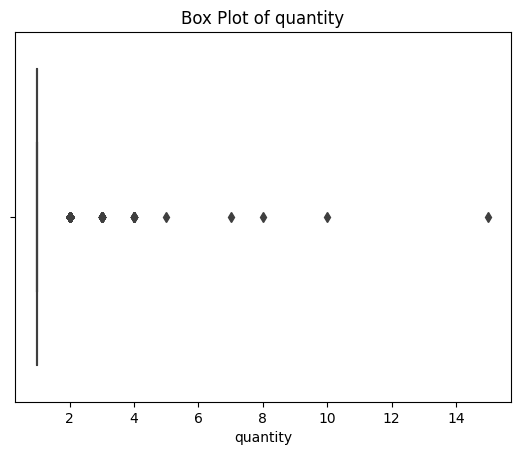

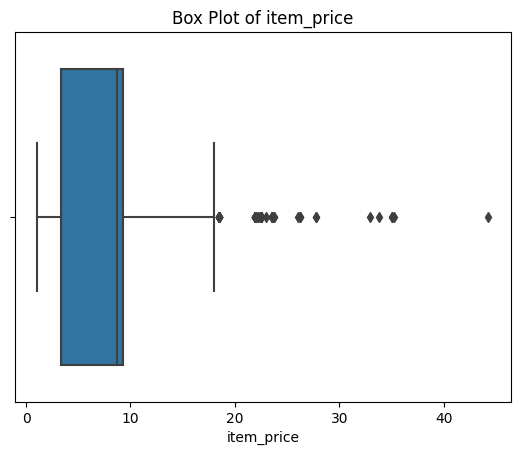

In [282]:
# Create a box plot for 'quantity'
sns.boxplot(x=df['quantity'])
plt.title('Box Plot of quantity')
plt.show()

# Create a box plot for 'item_price'
sns.boxplot(x=df['item_price'])
plt.title('Box Plot of item_price')
plt.show()

In [283]:
# Display unique values in the 'choice_description' column
unique_choices = df['choice_description'].unique()
print('Unique Choices:', unique_choices)

Unique Choices: ['None' '[Clementine]' '[Apple]' ...
 '[Roasted Chili Corn Salsa, [Pinto Beans, Sour Cream, Cheese, Lettuce, Guacamole]]'
 '[Tomatillo Green Chili Salsa, [Rice, Black Beans]]'
 '[Tomatillo Green Chili Salsa, [Rice, Fajita Vegetables, Black Beans, Guacamole]]']


In [284]:
# Display entries with multiple descriptions for a single item
multiple_descriptions = df[df.duplicated(subset=['item_name', 'choice_description'], keep=False)]
print('Entries with Multiple Descriptions:')
print(multiple_descriptions[['item_name', 'choice_description']])

Entries with Multiple Descriptions:
                                  item_name  \
0              Chips and Fresh Tomato Salsa   
1                                      Izze   
2                          Nantucket Nectar   
3     Chips and Tomatillo-Green Chili Salsa   
5                              Chicken Bowl   
...                                     ...   
4617                          Steak Burrito   
4618                          Steak Burrito   
4619                     Chicken Salad Bowl   
4620                     Chicken Salad Bowl   
4621                     Chicken Salad Bowl   

                                     choice_description  
0                                                  None  
1                                          [Clementine]  
2                                               [Apple]  
3                                                  None  
5     [Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...  
...                                                

In [285]:
df['choice_description'] =  df['choice_description'].str.replace('[\[\]]', '', regex=True)

In [286]:
# df['choice_description'].str.split(',',9,expand=True)
split_choices= df['choice_description'].str.split(',  ',expand=True)
num_columns= split_choices.shape[1]
new_column_names = [f"choice_{i+1}" for i in range(num_columns)]
split_choices.columns = new_column_names

In [287]:
# Check for special characters in the 'Item Name' column
has_special_characters = df['item_name'].str.contains(r'[^\w\s]', na=False)
print(df[has_special_characters][['item_name']])

                                  item_name
3     Chips and Tomatillo-Green Chili Salsa
15    Chips and Tomatillo-Green Chili Salsa
30    Chips and Tomatillo-Green Chili Salsa
113   Chips and Tomatillo-Green Chili Salsa
133   Chips and Tomatillo-Green Chili Salsa
...                                     ...
3810  Chips and Tomatillo-Green Chili Salsa
3871  Chips and Tomatillo-Green Chili Salsa
3905     Chips and Roasted Chili-Corn Salsa
4007  Chips and Tomatillo-Green Chili Salsa
4088    Chips and Tomatillo-Red Chili Salsa

[69 rows x 1 columns]


In [288]:
# Replace special characters with a specific character (e.g., underscore) in the 'Item Name' column
df['item_name'] = df['item_name'].str.replace(r'[^\w\s]', '_', regex=True)

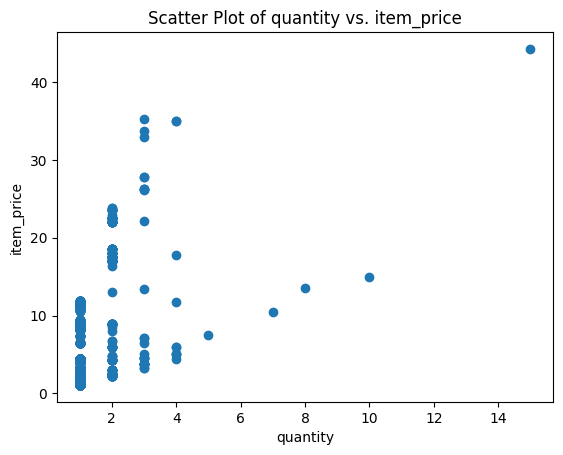

In [289]:
plt.scatter(df['quantity'], df['item_price'])
plt.xlabel('quantity')
plt.ylabel('item_price')
plt.title('Scatter Plot of quantity vs. item_price')
plt.show()

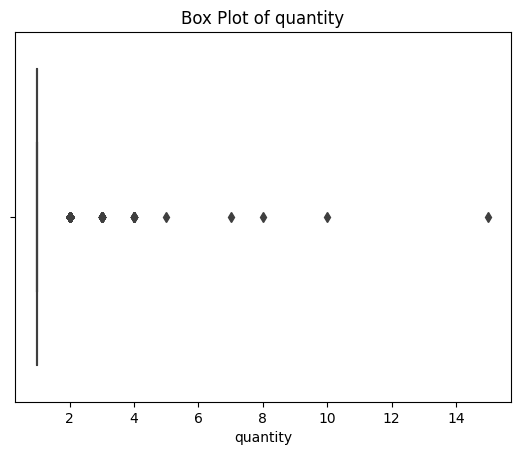

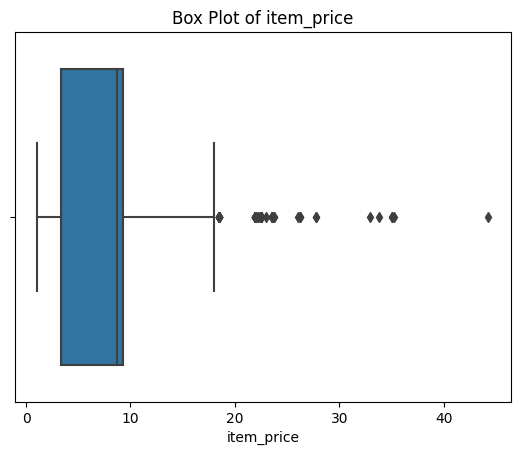

In [290]:
sns.boxplot(x=df['quantity'])
plt.title('Box Plot of quantity')
plt.show()

sns.boxplot(x=df['item_price'])
plt.title('Box Plot of item_price')
plt.show()

We'll group the data based on the order_id and them sum up the prices per each product to get the full value of the order.

In [291]:
grouped = df.groupby(['order_id']).sum()
print(grouped)

          quantity  item_price
order_id                      
1                4       11.56
2                2       16.98
3                2       12.67
4                2       21.00
5                2       13.70
...            ...         ...
1830             2       23.00
1831             3       12.90
1832             2       13.20
1833             2       23.50
1834             3       28.75

[1834 rows x 2 columns]


<ipython-input-291-df341346f226>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby(['order_id']).sum()


If we want to see what the distribution of the order values looks like, it's best to plot the data.

<ipython-input-292-169c5e59aa00>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(grouped)


Text(0.5, 1.0, 'General Distribution of the Order Value')

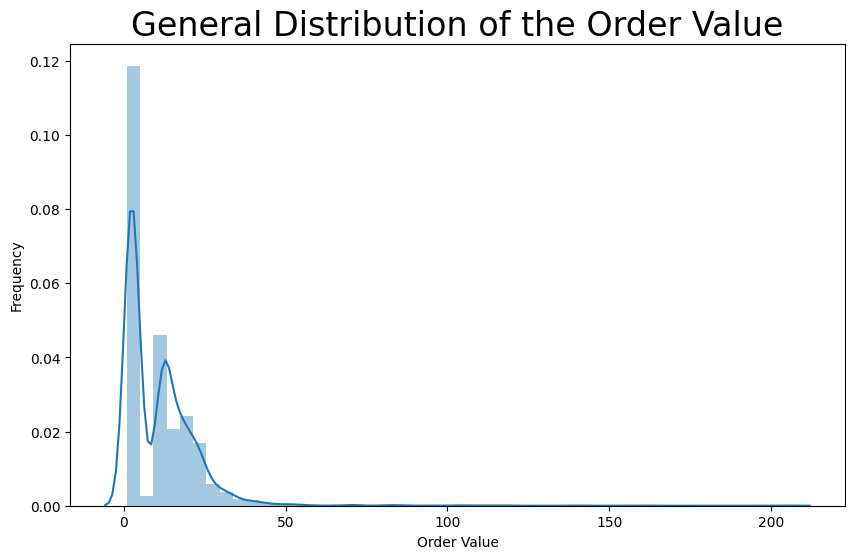

In [292]:
plt.figure(figsize=(10,6))
sns.distplot(grouped)
plt.xlabel("Order Value")
plt.ylabel("Frequency")
plt.title("General Distribution of the Order Value", size=24)

In [293]:
print(df.columns)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [294]:
df['order_value'] = df['quantity'] * df['item_price']
sorted_df = df.sort_values('order_value', ascending=False)
df

,order_id,quantity,item_name,choice_description,item_price,order_value
0,1,1,Chips and Fresh Tomato Salsa,None,2.39,2.39
1,1,1,Izze,Clementine,3.39,3.39
2,1,1,Nantucket Nectar,Apple,3.39,3.39
3,1,1,Chips and Tomatillo_Green Chili Salsa,None,2.39,2.39
4,2,2,Chicken Bowl,"Tomatillo-Red Chili Salsa (Hot), Black Beans, ...",16.98,33.96
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"Fresh Tomato Salsa, Rice, Black Beans, Sour Cr...",11.75,11.75
4618,1833,1,Steak Burrito,"Fresh Tomato Salsa, Rice, Sour Cream, Cheese, ...",11.75,11.75
4619,1834,1,Chicken Salad Bowl,"Fresh Tomato Salsa, Fajita Vegetables, Pinto B...",11.25,11.25
4620,1834,1,Chicken Salad Bowl,"Fresh Tomato Salsa, Fajita Vegetables, Lettuce",8.75,8.75


In [295]:
data = df.drop([df.index[3598]])
data = data.groupby(['order_id']).sum()

<ipython-input-295-9de6cf88f5f4>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(['order_id']).sum()


<ipython-input-296-b5a8c18760c0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)


Text(0.5, 1.0, 'General Distribution of the Order Value')

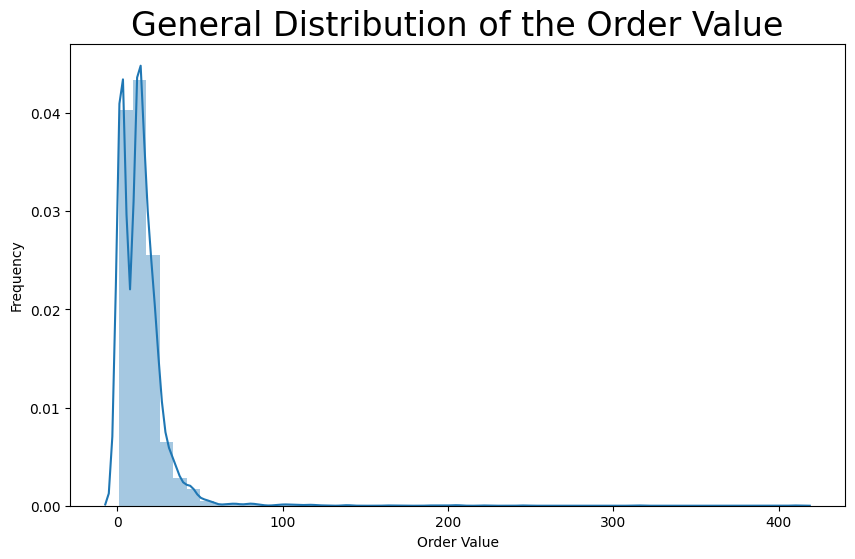

In [296]:
plt.figure(figsize=(10,6))
sns.distplot(data)
plt.xlabel("Order Value")
plt.ylabel("Frequency")
plt.title("General Distribution of the Order Value", size=24)

Finding the most common matches.We will group item_name per order_id and then use value_counts().

In [297]:
common_match = df.groupby('order_id')['item_name'].unique().astype(str).value_counts()
common_match[:6]

['Chicken Bowl' 'Chips and Guacamole']          68
['Chicken Bowl']                                61
['Chicken Burrito']                             51
['Chicken Burrito' 'Chips and Guacamole']       37
['Steak Burrito' 'Chips and Guacamole']         26
['Chicken Bowl' 'Chips' 'Canned Soft Drink']    24
Name: item_name, dtype: int64

Finding the most common matches for each item

In [298]:
df1 = df.reset_index()
df1 = df1.merge(df1, on='order_id').query('index_x > index_y')

df1 = pd.DataFrame(np.sort(df1[['item_name_x', 'item_name_y']].to_numpy(), axis=1))
df1.groupby([*df1]).size().sort_values(ascending=False)

0                                   1                                  
Chicken Bowl                        Chips and Guacamole                    179
                                    Chicken Bowl                           164
                                    Chicken Burrito                        155
                                    Chips                                  143
Canned Soft Drink                   Chicken Bowl                           134
                                                                          ... 
Chips and Guacamole                 Chips and Roasted Chili Corn Salsa       1
Barbacoa Soft Tacos                 Steak Soft Tacos                         1
                                    Steak Bowl                               1
                                    Chips and Roasted Chili Corn Salsa       1
Chips and Roasted Chili_Corn Salsa  Chips and Tomatillo_Red Chili Salsa      1
Length: 518, dtype: int64

In [299]:
df.head(20)

,order_id,quantity,item_name,choice_description,item_price,order_value
0,1,1,Chips and Fresh Tomato Salsa,None,2.39,2.39
1,1,1,Izze,Clementine,3.39,3.39
2,1,1,Nantucket Nectar,Apple,3.39,3.39
3,1,1,Chips and Tomatillo_Green Chili Salsa,None,2.39,2.39
4,2,2,Chicken Bowl,"Tomatillo-Red Chili Salsa (Hot), Black Beans, ...",16.98,33.96
5,3,1,Chicken Bowl,"Fresh Tomato Salsa (Mild), Rice, Cheese, Sour ...",10.98,10.98
6,3,1,Side of Chips,None,1.69,1.69
7,4,1,Steak Burrito,"Tomatillo Red Chili Salsa, Fajita Vegetables, ...",11.75,11.75
8,4,1,Steak Soft Tacos,"Tomatillo Green Chili Salsa, Pinto Beans, Chee...",9.25,9.25
9,5,1,Steak Burrito,"Fresh Tomato Salsa, Rice, Black Beans, Pinto B...",9.25,9.25


In [300]:
df['item_name'] = df['item_name'].str.replace('_', '-', regex=True)
df.head(20)

,order_id,quantity,item_name,choice_description,item_price,order_value
0,1,1,Chips and Fresh Tomato Salsa,None,2.39,2.39
1,1,1,Izze,Clementine,3.39,3.39
2,1,1,Nantucket Nectar,Apple,3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,None,2.39,2.39
4,2,2,Chicken Bowl,"Tomatillo-Red Chili Salsa (Hot), Black Beans, ...",16.98,33.96
5,3,1,Chicken Bowl,"Fresh Tomato Salsa (Mild), Rice, Cheese, Sour ...",10.98,10.98
6,3,1,Side of Chips,None,1.69,1.69
7,4,1,Steak Burrito,"Tomatillo Red Chili Salsa, Fajita Vegetables, ...",11.75,11.75
8,4,1,Steak Soft Tacos,"Tomatillo Green Chili Salsa, Pinto Beans, Chee...",9.25,9.25
9,5,1,Steak Burrito,"Fresh Tomato Salsa, Rice, Black Beans, Pinto B...",9.25,9.25


In [301]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,order_id,quantity,item_name,choice_description,item_price,order_value
238,103,1,Steak Burrito,"Tomatillo Red Chili Salsa, Rice, Black Beans, ...",11.75,11.75
248,108,1,Canned Soda,Mountain Dew,1.09,1.09
297,129,1,Steak Burrito,"Tomatillo Green Chili Salsa, Rice, Cheese, Gua...",11.75,11.75
381,165,1,Canned Soft Drink,Coke,1.25,1.25
484,205,1,Chicken Bowl,"Fresh Tomato Salsa, Fajita Vegetables, Rice, B...",8.75,8.75
567,233,1,Canned Soft Drink,Diet Coke,1.25,1.25
617,254,1,Chips,None,2.15,2.15
684,282,1,Canned Soft Drink,Coke,1.25,1.25
773,319,1,Chicken Bowl,"Tomatillo-Green Chili Salsa (Medium), Black Beans",8.49,8.49
908,376,1,Steak Burrito,"Roasted Chili Corn Salsa (Medium), Rice, Fajit...",8.99,8.99


In [302]:
df = df.drop_duplicates()

# Display the DataFrame without duplicates

df


,order_id,quantity,item_name,choice_description,item_price,order_value
0,1,1,Chips and Fresh Tomato Salsa,None,2.39,2.39
1,1,1,Izze,Clementine,3.39,3.39
2,1,1,Nantucket Nectar,Apple,3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,None,2.39,2.39
4,2,2,Chicken Bowl,"Tomatillo-Red Chili Salsa (Hot), Black Beans, ...",16.98,33.96
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"Fresh Tomato Salsa, Rice, Black Beans, Sour Cr...",11.75,11.75
4618,1833,1,Steak Burrito,"Fresh Tomato Salsa, Rice, Sour Cream, Cheese, ...",11.75,11.75
4619,1834,1,Chicken Salad Bowl,"Fresh Tomato Salsa, Fajita Vegetables, Pinto B...",11.25,11.25
4620,1834,1,Chicken Salad Bowl,"Fresh Tomato Salsa, Fajita Vegetables, Lettuce",8.75,8.75
